In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
from torch.autograd import Variable
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data, 1)  #class0 feature 标准差为1
y0 = torch.zeros(100)
x1 = torch.normal(-2*n_data,1) #class1 feature
y1 = torch.ones(100)
x = torch.cat((x0,x1),0).type(torch.FloatTensor) # FloatTensor = 32bit
# torch 默认label是long
y = torch.cat((y0,y1),).type(torch.LongTensor) # LongTensor = 64bit integer
x, y = Variable(x), Variable(y)

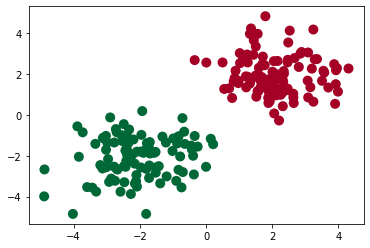

In [3]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self,n_features, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [5]:
net = Net(2, 10, 2)
# [0,1] class 1
# [1,0] class0
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

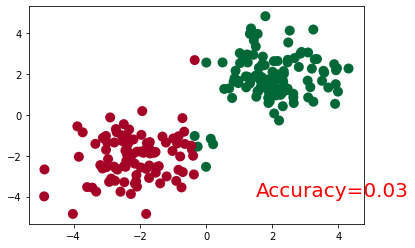

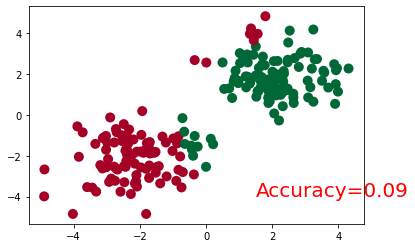

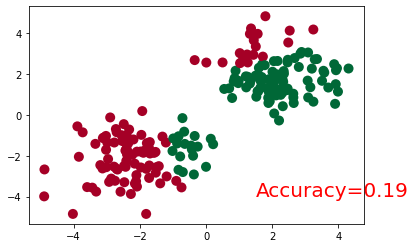

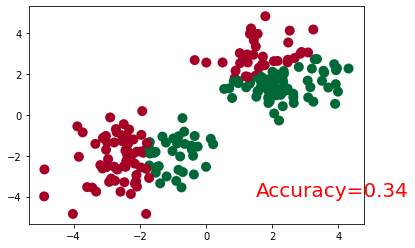

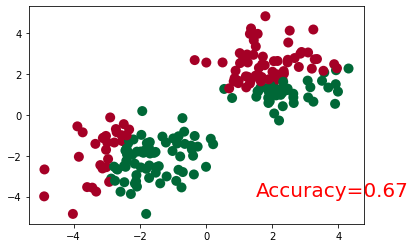

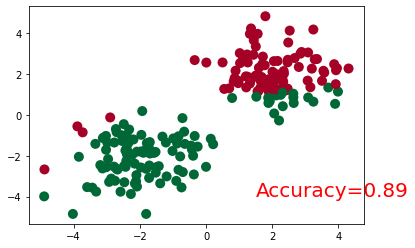

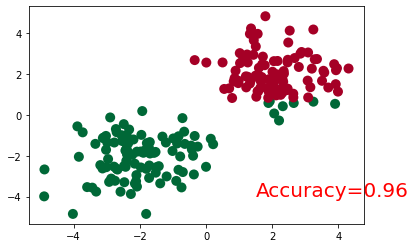

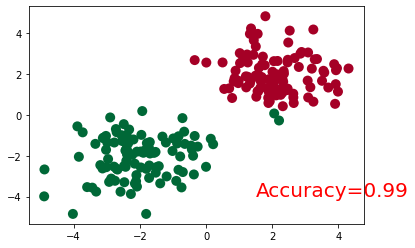

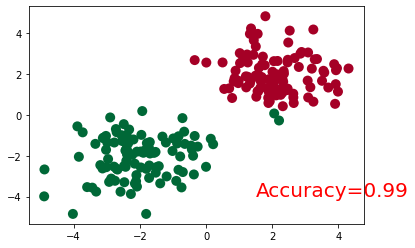

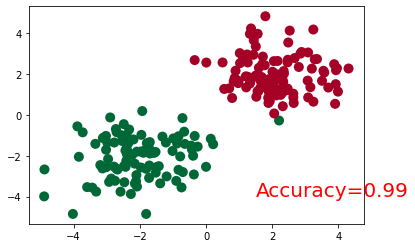

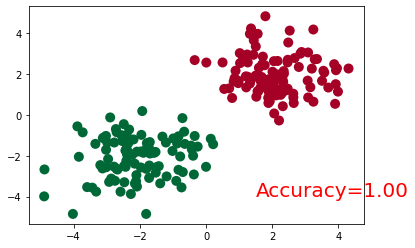

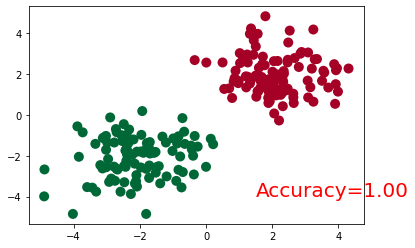

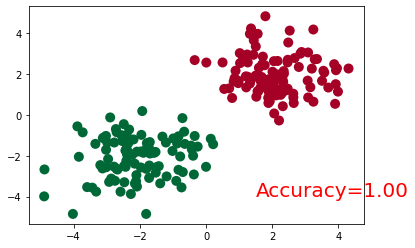

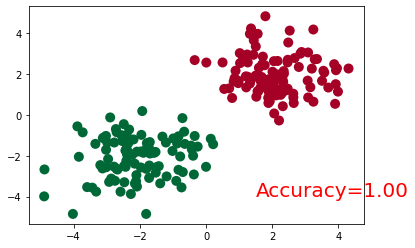

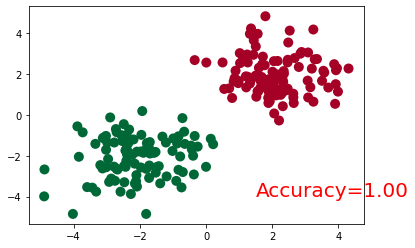

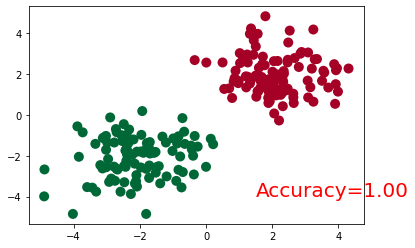

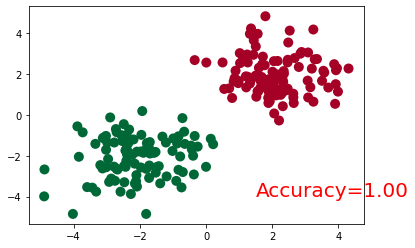

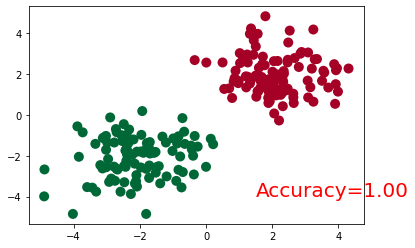

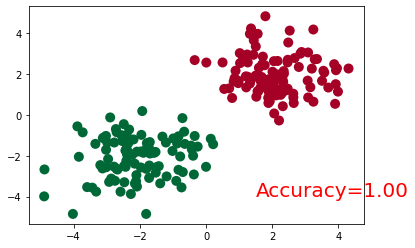

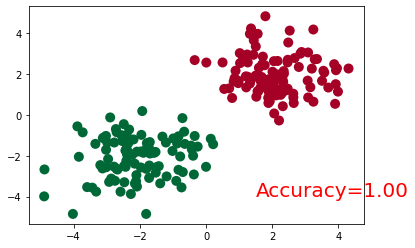

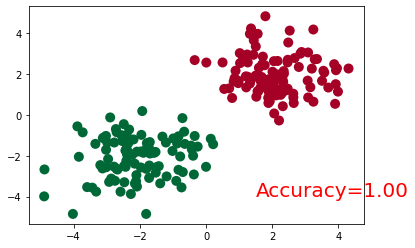

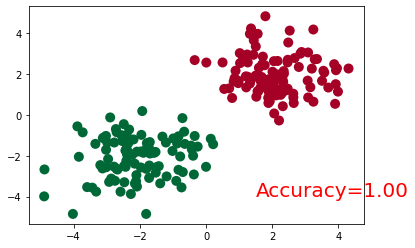

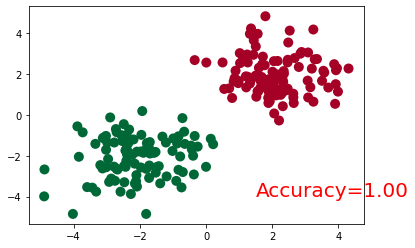

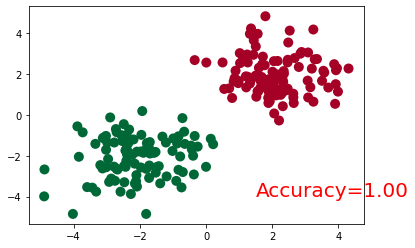

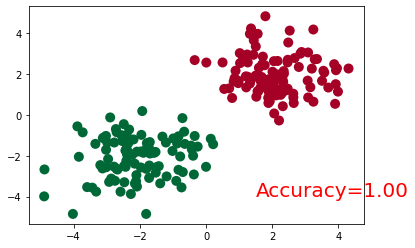

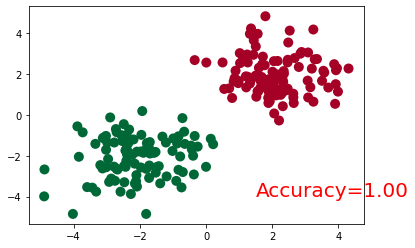

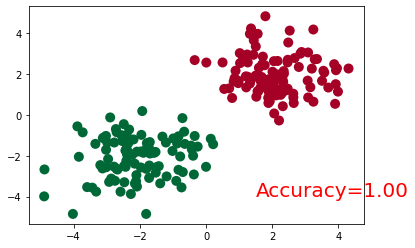

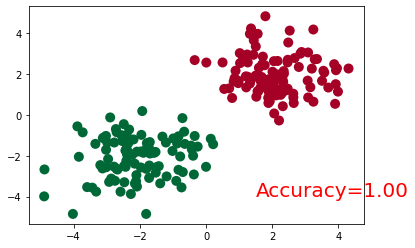

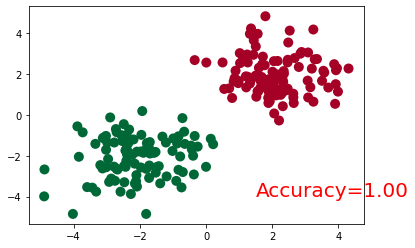

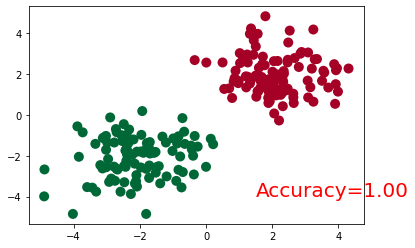

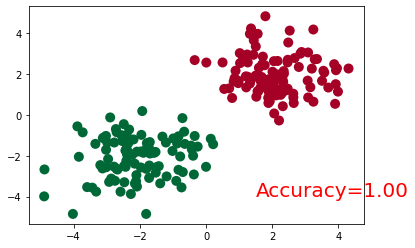

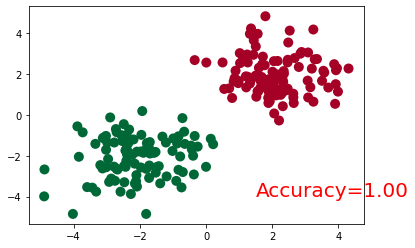

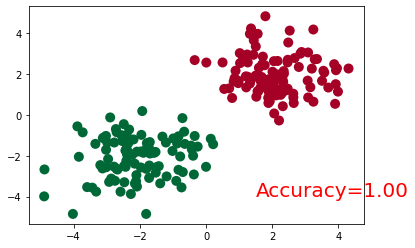

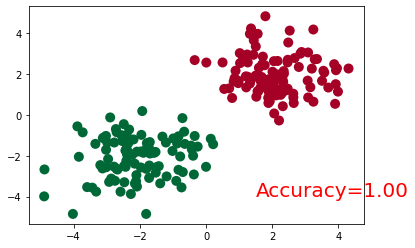

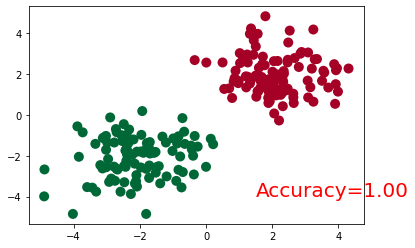

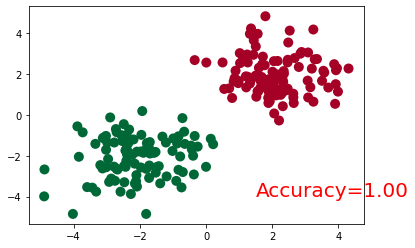

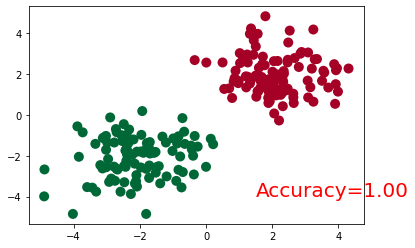

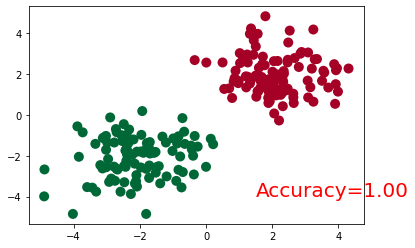

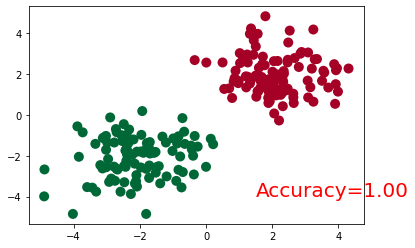

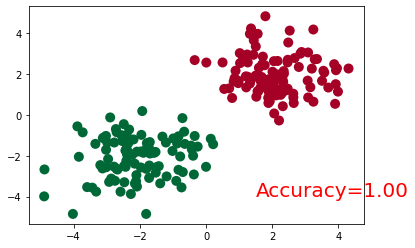

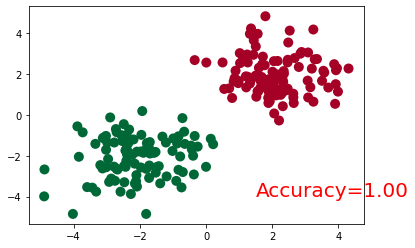

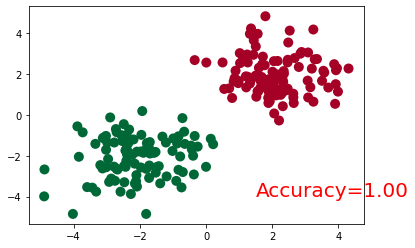

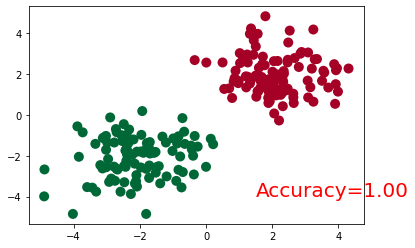

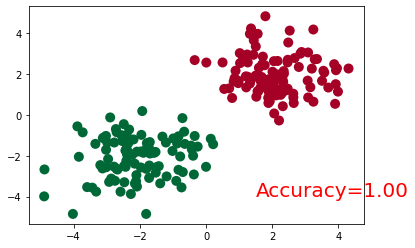

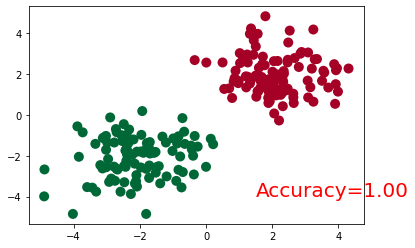

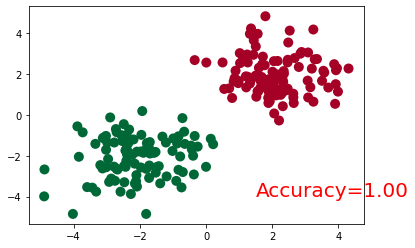

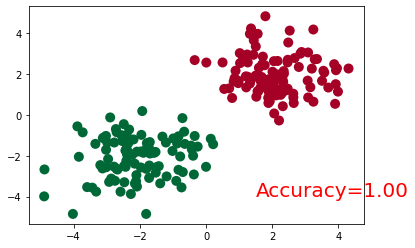

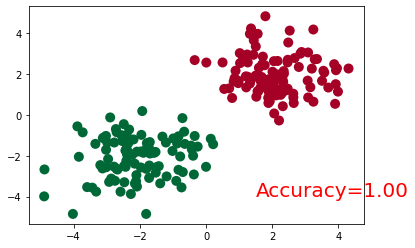

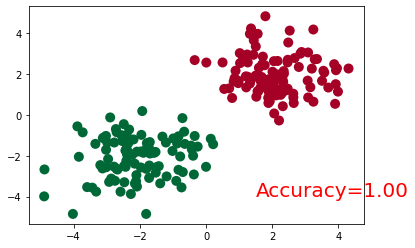

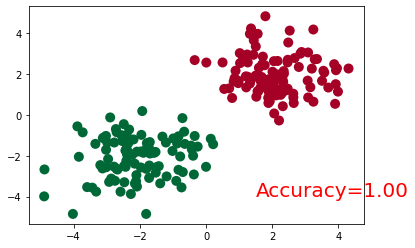

In [6]:
for t in range(100):
    out = net(x)     # input x and predict based on x

    loss = loss_func(out, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]# [0]返回索引的最大值 [1]返回索引的位置
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
